### Logistic Regression Exercise

[guide](https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/)

In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print the shape of X

In [3]:
X.shape

(150, 4)

* print y

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [5]:
logreg = linear_model.LogisticRegression(max_iter=1000) 

* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [6]:
penalty = ['l1', 'l2']

* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [7]:
C = np.logspace(0, 4, 10)

* create a hyperparameter options dictionary

In [8]:
hyperparameters = dict(C=C, penalty=penalty)

* create a grid search using 5-fold cross validation

In [9]:
clf = GridSearchCV(estimator=logreg, param_grid=hyperparameters, cv=5, n_jobs=-1)

* fit the grid search

In [10]:
clf.fit(X, y)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.97333333        nan 0.97333333        nan 0.97333333
        nan 0.98              nan 0.98              nan 0.97333333
        nan 0.97333333        nan 0.97333333        nan 0.97333333
        nan 0.97333333]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

* take the best model from grid search

In [11]:
clf.best_estimator_

LogisticRegression(C=21.544346900318832, max_iter=1000)

* print the best hyperparameters

In [12]:
# view best hyperparameters
print(f'Best C: {clf.best_estimator_.C}')
print(f'Best Penalty: {clf.best_estimator_.penalty}')

Best C: 21.544346900318832
Best Penalty: l2


* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [13]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
y_pred_proba = clf.predict_proba(X)
y_pred_proba

array([[9.98599690e-01, 1.40030959e-03, 9.37474407e-18],
       [9.96647994e-01, 3.35200589e-03, 1.26175659e-16],
       [9.99013625e-01, 9.86375187e-04, 1.77817818e-17],
       [9.97398214e-01, 2.60178575e-03, 2.45798435e-16],
       [9.99052031e-01, 9.47968873e-04, 5.91818090e-18],
       [9.97000586e-01, 2.99941435e-03, 1.21443205e-16],
       [9.99212686e-01, 7.87314162e-04, 4.23650421e-17],
       [9.97630288e-01, 2.36971197e-03, 4.57878331e-17],
       [9.98031131e-01, 1.96886928e-03, 2.58819500e-16],
       [9.95696314e-01, 4.30368620e-03, 9.78924524e-17],
       [9.97841706e-01, 2.15829388e-03, 8.52927380e-18],
       [9.97284738e-01, 2.71526201e-03, 1.41203105e-16],
       [9.96999290e-01, 3.00070992e-03, 5.97504601e-17],
       [9.99632868e-01, 3.67131996e-04, 3.26648311e-18],
       [9.99481164e-01, 5.18835618e-04, 7.00506859e-20],
       [9.99398885e-01, 6.01115436e-04, 1.07841841e-18],
       [9.99491882e-01, 5.08118088e-04, 1.89269365e-18],
       [9.98658480e-01, 1.34152

- plot the ROC curve and print the AUC

In [15]:
# binarize the output
# each target for each classes
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

In [16]:
# binarize the proba
y_pred_proba_bin = label_binarize(y_pred, classes=[0, 1, 2])

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt

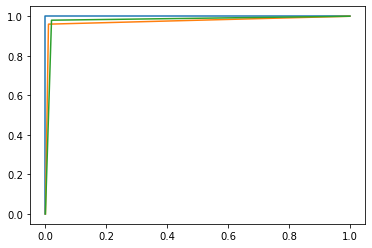

In [18]:
# auc for first class
fpr = dict()
tpr = dict()
auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], y_pred_proba_bin[:, i])
    auc[i] = metrics.roc_auc_score(y_bin[:, i], y_pred_proba_bin[:, i])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {i}')

plt.show()

* print the Logreg coeficients

In [19]:
clf.best_estimator_.coef_

array([[-0.3708001 ,  2.46594275, -4.95157957, -2.49224333],
       [ 1.16931021,  0.10025475, -0.50669425, -2.9217291 ],
       [-0.79851011, -2.5661975 ,  5.45827382,  5.41397243]])

* print the Logreg intercepts